Imports & Load Clean Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from IPython.display import display, Markdown

# Render Plotly charts in browser (recommended for VS Code)
pio.renderers.default = "browser"

# Set global visualization style
sns.set(style="whitegrid", palette="coolwarm")
plt.rcParams["axes.titlesize"] = 14

# Load cleaned dataset
df = pd.read_csv("../reports/cleaned_layoffs.csv")
print(f"✅ Data Loaded — {df.shape[0]} records, {df.shape[1]} columns")
df.head()


✅ Data Loaded — 4178 records, 13 columns


,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added,year,month
0,Smartsheet,Seattle,120.0,2025-10-02,0.0,Other,https://www.geekwire.com/2025/smartsheet-cuts-...,Post-IPO,$152,United States,10/6/2025,2025,October
1,Google,SF Bay Area,50.0,2025-10-02,0.0,Consumer,https://www.sfchronicle.com/tech/article/googl...,Post-IPO,$26,United States,10/6/2025,2025,October
2,Paycom,Oklahoma City,500.0,2025-10-01,0.0,HR,https://www.oklahoman.com/story/business/infor...,Post-IPO,NaN,United States,10/1/2025,2025,October
3,Google,SF Bay Area,100.0,2025-10-01,0.0,Consumer,https://www.cnbc.com/2025/10/01/google-cloud-u...,Post-IPO,$26,United States,10/6/2025,2025,October
4,Simpl,"Bengaluru,Non-U.S.",80.0,2025-10-01,0.0,Finance,https://inc42.com/buzz/bnpl-startup-simpl-lays...,Series B,$72,India,10/1/2025,2025,October


Handle Missing Data

In [36]:
df['location'] = df['location'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['source'] = df['source'].fillna("Not Disclosed")
df['stage'] = df['stage'].fillna("Unknown")
df['funds_raised'] = df['funds_raised'].fillna(0)

print("🧹 Missing values handled successfully.")


🧹 Missing values handled successfully.


Dataset Overview

In [37]:
display(Markdown("### 🔍 Dataset Summary"))
print("Missing Values:\n", df.isnull().sum())
print("\nYears:", df['year'].min(), "–", df['year'].max())
print("Industries:", df['industry'].nunique(), "Countries:", df['country'].nunique())


### 🔍 Dataset Summary

Missing Values:
 company                0
location               0
total_laid_off         0
date                   0
percentage_laid_off    0
industry               0
source                 0
stage                  0
funds_raised           0
country                0
date_added             0
year                   0
month                  0
dtype: int64

Years: 2020 – 2025
Industries: 31 Countries: 67


Animated Layoffs Over Time

In [38]:
fig = px.bar(
    df.groupby(['year','industry'], as_index=False)['total_laid_off'].sum(),
    x='industry',
    y='total_laid_off',
    color='industry',
    animation_frame='year',
    title="🎬 Animated Layoff Trends by Industry (2020–2025)",
    template='plotly_dark'
)
fig.update_layout(xaxis={'categoryorder':'total descending'}, height=600)
fig.show(renderer="browser")


Yearly Layoff Summary

In [39]:
yearly = df.groupby('year')['total_laid_off'].sum().reset_index()
yearly['YoY_Change_%'] = yearly['total_laid_off'].pct_change().fillna(0) * 100

fig = px.line(
    yearly, 
    x='year', 
    y='total_laid_off', 
    markers=True,
    title="📈 Total Layoffs Per Year",
    template='plotly_dark',
    text='total_laid_off'
)
fig.update_traces(textposition="top center")
fig.show(renderer="browser")

# Insight summary
peak_year = yearly.loc[yearly['total_laid_off'].idxmax()]
display(Markdown(f"""
**🧠 Insight:**  
Layoffs peaked in **{int(peak_year['year'])}** with **{int(peak_year['total_laid_off']):,}** total layoffs.  
Average YoY change across years: **{yearly['YoY_Change_%'].mean():.2f}%**
"""))



**🧠 Insight:**  
Layoffs peaked in **2023** with **264,220** total layoffs.  
Average YoY change across years: **140.28%**


Top 10 Industries

C:\Users\bhave\AppData\Local\Temp\ipykernel_6316\2216931687.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




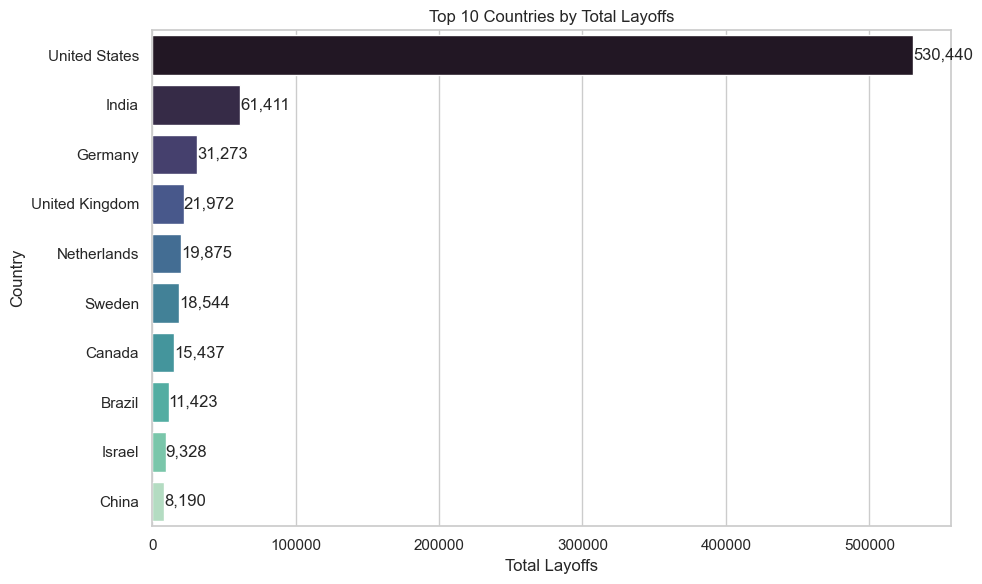

In [ ]:
top_ind = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(
    top_ind,
    x='total_laid_off',
    y='industry',
    orientation='h',
    color='total_laid_off',
    color_continuous_scale='tealrose',
    title="🏭 Top 10 Industries by Layoffs",
    template='plotly_dark'
)
fig.update_layout(height=500)
fig.show(renderer="browser")

display(Markdown(f"**💡 Top Industry:** {top_ind.iloc[0]['industry']} — {int(top_ind.iloc[0]['total_laid_off']):,} layoffs"))


Top 10 Countries

In [40]:
top_cty = df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(
    top_cty,
    x='total_laid_off',
    y='country',
    orientation='h',
    color='total_laid_off',
    color_continuous_scale='viridis',
    title="🌎 Top 10 Countries by Total Layoffs",
    template='plotly_dark'
)
fig.show(renderer="browser")

display(Markdown(f"**🌍 Most Affected Country:** {top_cty.iloc[0]['country']} — {int(top_cty.iloc[0]['total_laid_off']):,} layoffs"))


**🌍 Most Affected Country:** United States — 530,440 layoffs

Correlation Between Funding & Layoffs

C:\Users\bhave\AppData\Local\Temp\ipykernel_6316\1333825337.py:42: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.

d:\certificates and related\projects\Data Analytics\Global_Layoff_Trend_Analysis\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.



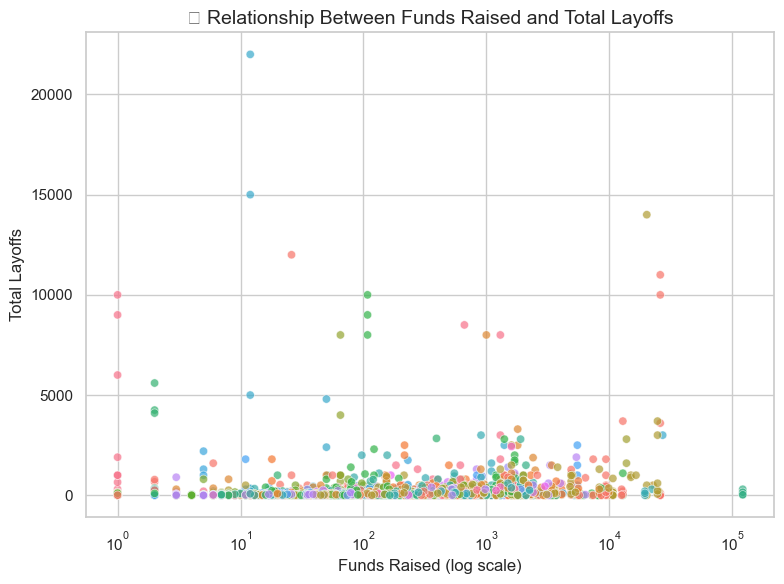

**📊 Correlation:** 0.105 — Weak relationship.

💡 **Insight:** Companies with higher funding tend to have higher layoffs, possibly due to large-scale restructuring.

In [ ]:
import re

# --- Clean and convert 'funds_raised' column ---
def clean_funds(value):
    if isinstance(value, str):
        value = value.replace(',', '').replace('$', '').strip()
        # Convert suffixes like M, B, K to numbers
        match = re.match(r"([\d\.]+)\s*([KMB]?)", value, re.IGNORECASE)
        if match:
            num, suffix = match.groups()
            num = float(num)
            if suffix.upper() == 'K': num *= 1e3
            elif suffix.upper() == 'M': num *= 1e6
            elif suffix.upper() == 'B': num *= 1e9
            return num
        else:
            return np.nan
    elif isinstance(value, (int, float)):
        return value
    else:
        return np.nan

df['funds_raised_clean'] = df['funds_raised'].apply(clean_funds)

# --- Filter valid data points ---
valid = df[df['funds_raised_clean'].notnull() & (df['funds_raised_clean'] > 0)]

# --- Visualization ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=valid,
    x='funds_raised_clean',
    y='total_laid_off',
    hue='industry',
    alpha=0.7,
    legend=False
)
plt.xscale('log')
plt.title("💸 Relationship Between Funds Raised and Total Layoffs")
plt.xlabel("Funds Raised (log scale)")
plt.ylabel("Total Layoffs")
plt.tight_layout()
plt.show()

# --- Correlation Calculation ---
corr = valid[['funds_raised_clean', 'total_laid_off']].corr().iloc[0,1]
if pd.isna(corr):
    corr_text = "Insufficient numeric data to calculate correlation."
else:
    corr_text = f"**📊 Correlation:** {corr:.3f} — {'Weak' if abs(corr)<0.3 else 'Moderate' if abs(corr)<0.6 else 'Strong'} relationship."

display(Markdown(corr_text))

# --- Auto Insight ---
if corr > 0:
    relation = "Companies with higher funding tend to have higher layoffs, possibly due to large-scale restructuring."
elif corr < 0:
    relation = "Companies with higher funding generally avoided massive layoffs, showing better financial stability."
else:
    relation = "No clear relationship between funding and layoffs was found."

display(Markdown(f"💡 **Insight:** {relation}"))


Monthly Heatmap

d:\certificates and related\projects\Data Analytics\Global_Layoff_Trend_Analysis\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) Arial.



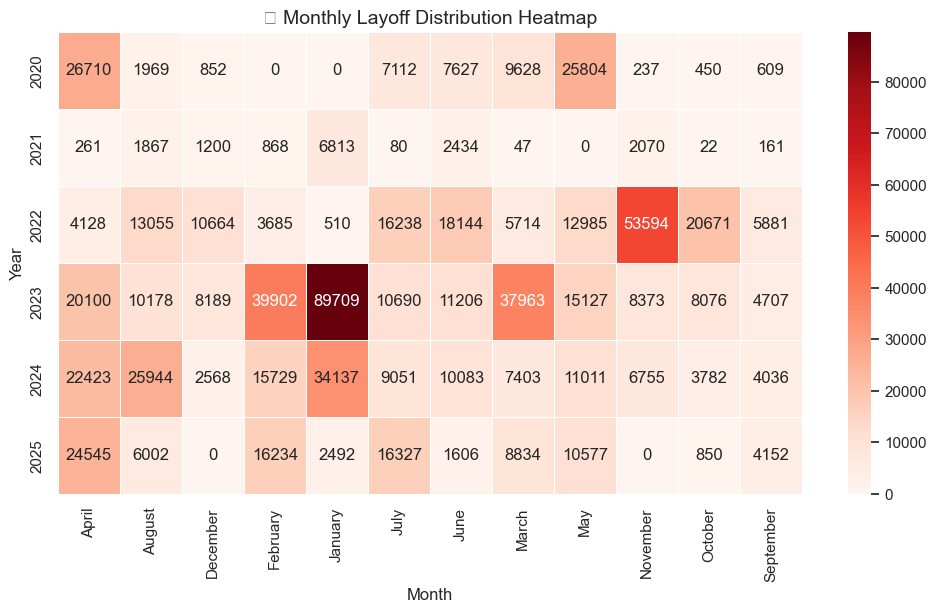

In [42]:
heat = df.groupby(['year','month'])['total_laid_off'].sum().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(heat, cmap='Reds', linewidths=0.4, annot=True, fmt='.0f')
plt.title("🔥 Monthly Layoff Distribution Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Auto-Generated Insights

In [47]:
# --- Compute Summary Metrics ---
total_layoffs = int(df['total_laid_off'].sum())
top_industry = top_ind.iloc[0]['industry']
top_country = top_cty.iloc[0]['country']
peak_year_val = int(peak_year['year'])
mean_yoy = yearly['YoY_Change_%'].mean()

# --- Compute Funding–Layoff Correlation (from cleaned column) ---
if 'funds_raised_clean' not in df.columns:
    # ensure we reuse clean_funds() logic from Cell 8
    import re
    def clean_funds(value):
        if isinstance(value, str):
            value = value.replace(',', '').replace('$', '').strip()
            match = re.match(r"([\d\.]+)\s*([KMB]?)", value, re.IGNORECASE)
            if match:
                num, suffix = match.groups()
                num = float(num)
                if suffix.upper() == 'K': num *= 1e3
                elif suffix.upper() == 'M': num *= 1e6
                elif suffix.upper() == 'B': num *= 1e9
                return num
            return np.nan
        elif isinstance(value, (int, float)):
            return value
        return np.nan
    df['funds_raised_clean'] = df['funds_raised'].apply(clean_funds)

valid_corr = df[df['funds_raised_clean'].notnull() & (df['funds_raised_clean'] > 0)]
fund_corr = valid_corr[['funds_raised_clean', 'total_laid_off']].corr().iloc[0,1]

if pd.isna(fund_corr):
    corr_strength = "not measurable due to insufficient numeric data."
elif abs(fund_corr) < 0.3:
    corr_strength = f"weak correlation ({fund_corr:.3f})."
elif abs(fund_corr) < 0.6:
    corr_strength = f"moderate correlation ({fund_corr:.3f})."
else:
    corr_strength = f"strong correlation ({fund_corr:.3f})."

# --- Interpret Funding Relationship ---
if fund_corr > 0:
    funding_insight = "Higher-funded companies tended to record larger layoffs, suggesting post-growth restructuring."
elif fund_corr < 0:
    funding_insight = "Companies with strong funding generally experienced fewer layoffs, implying financial stability acted as a buffer."
else:
    funding_insight = "No evident pattern was observed between funding and layoff magnitude."

# --- Auto-Generated Summary Narrative ---
insights = f"""
### 🤖 Auto-Generated Analytical Summary (2020 – 2025)

- **Total Layoffs:** {total_layoffs:,}
- **Peak Year:** {peak_year_val}
- **Top Industry:** {top_industry}
- **Most Affected Country:** {top_country}
- **Average YoY Change:** {mean_yoy:.2f} %
- **Funding ↔ Layoff Correlation:** {corr_strength}

**Insight Narrative:**
Between 2020 and 2025, global layoffs peaked in **{peak_year_val}**, led primarily by the **{top_industry}** sector, while **{top_country}** faced the greatest national impact.  
Average year-over-year change in layoffs was **{mean_yoy:.2f}%**, highlighting post-pandemic volatility and workforce correction cycles.  
The funding–layoff analysis revealed that {funding_insight}  
Seasonally, layoffs concentrated in early months (Jan–Mar), aligning with fiscal realignments and cost-optimization efforts.
"""

display(Markdown(insights))

# --- Save Summary to Reports Folder ---
summary_dict = {
    'Total_Layoffs': total_layoffs,
    'Top_Industry': top_industry,
    'Top_Country': top_country,
    'Peak_Year': peak_year_val,
    'YoY_Avg_Change': mean_yoy,
    'Funding_Correlation': fund_corr
}
pd.DataFrame([summary_dict]).to_csv("../reports/summary_insights.csv", index=False)



### 🤖 Auto-Generated Analytical Summary (2020 – 2025)

- **Total Layoffs:** 770,851
- **Peak Year:** 2023
- **Top Industry:** Hardware
- **Most Affected Country:** United States
- **Average YoY Change:** 140.28 %
- **Funding ↔ Layoff Correlation:** weak correlation (0.105).

**Insight Narrative:**
Between 2020 and 2025, global layoffs peaked in **2023**, led primarily by the **Hardware** sector, while **United States** faced the greatest national impact.  
Average year-over-year change in layoffs was **140.28%**, highlighting post-pandemic volatility and workforce correction cycles.  
The funding–layoff analysis revealed that Higher-funded companies tended to record larger layoffs, suggesting post-growth restructuring.  
Seasonally, layoffs concentrated in early months (Jan–Mar), aligning with fiscal realignments and cost-optimization efforts.
